# Data Analysis on 

* UNI: yy2723
* Name: Yaning Yu

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [2]:
#write code below, you can make multiple cells
import pandas as pd
import numpy as np
#,na_values="unknown"
data = pd.read_csv('data/data.csv')
data = data.drop('duration',axis = 1)
data.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


In [2]:
label = data['subscribed']
label.head()

0    no
1    no
2    no
3    no
4    no
Name: subscribed, dtype: object

In [3]:
train = data.drop('subscribed',axis = 1)
train.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0


In [4]:
holdout = pd.read_csv("data/holdout.csv")
holdout = holdout.drop('duration',axis = 1)
holdout.head()

,ID,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2866,47.0,admin.,divorced,university.degree,unknown,no,no,telephone,may,tue,2.0,999,0,nonexistent,1.247123,92.972198,-35.612530,4.932103,5190.0
1,1957,40.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,mon,5.0,999,0,nonexistent,1.336096,95.085866,-40.841331,5.082825,5225.0
2,768,42.0,technician,married,professional.course,no,yes,no,cellular,jul,thu,3.0,999,0,nonexistent,1.388607,93.705043,-42.039772,4.941916,5232.0
3,4510,53.0,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,fri,1.0,999,0,nonexistent,1.146340,92.826786,-36.824117,4.916084,5205.0
4,7893,54.0,self-employed,married,high.school,no,yes,no,cellular,aug,fri,6.0,999,0,nonexistent,1.490160,94.392184,-36.710934,4.999765,5226.0


In [5]:
X_holdout = pd.DataFrame(holdout.ix[:,1:])
X_holdout.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,47.0,admin.,divorced,university.degree,unknown,no,no,telephone,may,tue,2.0,999,0,nonexistent,1.247123,92.972198,-35.612530,4.932103,5190.0
1,40.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,mon,5.0,999,0,nonexistent,1.336096,95.085866,-40.841331,5.082825,5225.0
2,42.0,technician,married,professional.course,no,yes,no,cellular,jul,thu,3.0,999,0,nonexistent,1.388607,93.705043,-42.039772,4.941916,5232.0
3,53.0,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,fri,1.0,999,0,nonexistent,1.146340,92.826786,-36.824117,4.916084,5205.0
4,54.0,self-employed,married,high.school,no,yes,no,cellular,aug,fri,6.0,999,0,nonexistent,1.490160,94.392184,-36.710934,4.999765,5226.0


In [6]:
train.prev_days.loc[(train.prev_days>=0) & (train.prev_days<=10)] = 'one'
train.prev_days.loc[(train.prev_days>10) & (train.prev_days<=20)] = 'two'
train.prev_days.loc[(train.prev_days>20) & (train.prev_days<=30)] = 'three'
# train.prev_days.loc[(train.prev_days>15) & (train.prev_days<=20)] = 'four'
# train.prev_days.loc[(train.prev_days>20) & (train.prev_days<=25)] = 'five'
# train.prev_days.loc[(train.prev_days>25) & (train.prev_days<=30)] = 'six'
train.prev_days.loc[(train.prev_days==999)] = 'four'
train.dtypes

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


age               float64
job                object
marital_status     object
education          object
credit_default     object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
prev_days          object
prev_contacts       int64
prev_outcomes      object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [7]:
data_category = train.columns[train.dtypes == "object"]
data_category

Index([u'job', u'marital_status', u'education', u'credit_default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'prev_days',
       u'prev_outcomes'],
      dtype='object')

In [8]:
X_holdout.prev_days.loc[(X_holdout.prev_days>=0) & (X_holdout.prev_days<=10)] = 'one'
#X_holdout.prev_days.loc[(X_holdout.prev_days>5) & (X_holdout.prev_days<=10)] = ''
X_holdout.prev_days.loc[(X_holdout.prev_days>10) & (X_holdout.prev_days<=20)] = 'two'
X_holdout.prev_days.loc[(X_holdout.prev_days>20) & (X_holdout.prev_days<=30)] = 'three'
#X_holdout.prev_days.loc[(X_holdout.prev_days>20) & (X_holdout.prev_days<=25)] = 'five'
#X_holdout.prev_days.loc[(X_holdout.prev_days>25) & (X_holdout.prev_days<=30)] = 'six'
X_holdout.prev_days.loc[(X_holdout.prev_days==999)] = 'four'
X_holdout.dtypes

age               float64
job                object
marital_status     object
education          object
credit_default     object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
prev_days          object
prev_contacts       int64
prev_outcomes      object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [9]:
train[data_category].head()

,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,prev_days,prev_outcomes
0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,four,nonexistent
1,entrepreneur,married,unknown,no,no,no,cellular,may,wed,four,nonexistent
2,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,four,nonexistent
3,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,four,nonexistent
4,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,four,nonexistent


In [10]:
 X_holdout[data_category].head()

,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,prev_days,prev_outcomes
0,admin.,divorced,university.degree,unknown,no,no,telephone,may,tue,four,nonexistent
1,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,mon,four,nonexistent
2,technician,married,professional.course,no,yes,no,cellular,jul,thu,four,nonexistent
3,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,fri,four,nonexistent
4,self-employed,married,high.school,no,yes,no,cellular,aug,fri,four,nonexistent


In [11]:
for ele in data_category:
    cat = np.union1d(train[ele], X_holdout[ele])
    train[ele] = train[ele].astype("category", categories=cat)
    X_holdout[ele] = X_holdout[ele].astype("category", categories=cat)
# categories = np.union1d(train[data_category], X_holdout[data_category])
# train[data_category] = train[data_category].apply(lambda x:x.astype('category', categories=categories), axis=0)
# X_holdout[data_category] = X_holdout[data_category].apply(lambda x:x.astype('category', categories=categories), axis=0)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['four' 'one' 'three' 'two']
['failure' 'nonexistent' 'success']


no     29238
yes     3712
Name: subscribed, dtype: int64

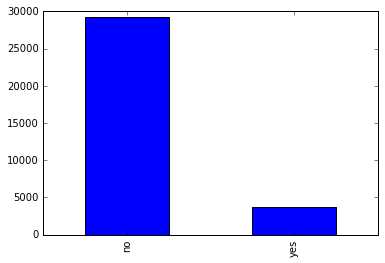

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
label.value_counts().plot(kind='bar')
label.value_counts()

## from the histogram, we can see the dataset is inbalanced

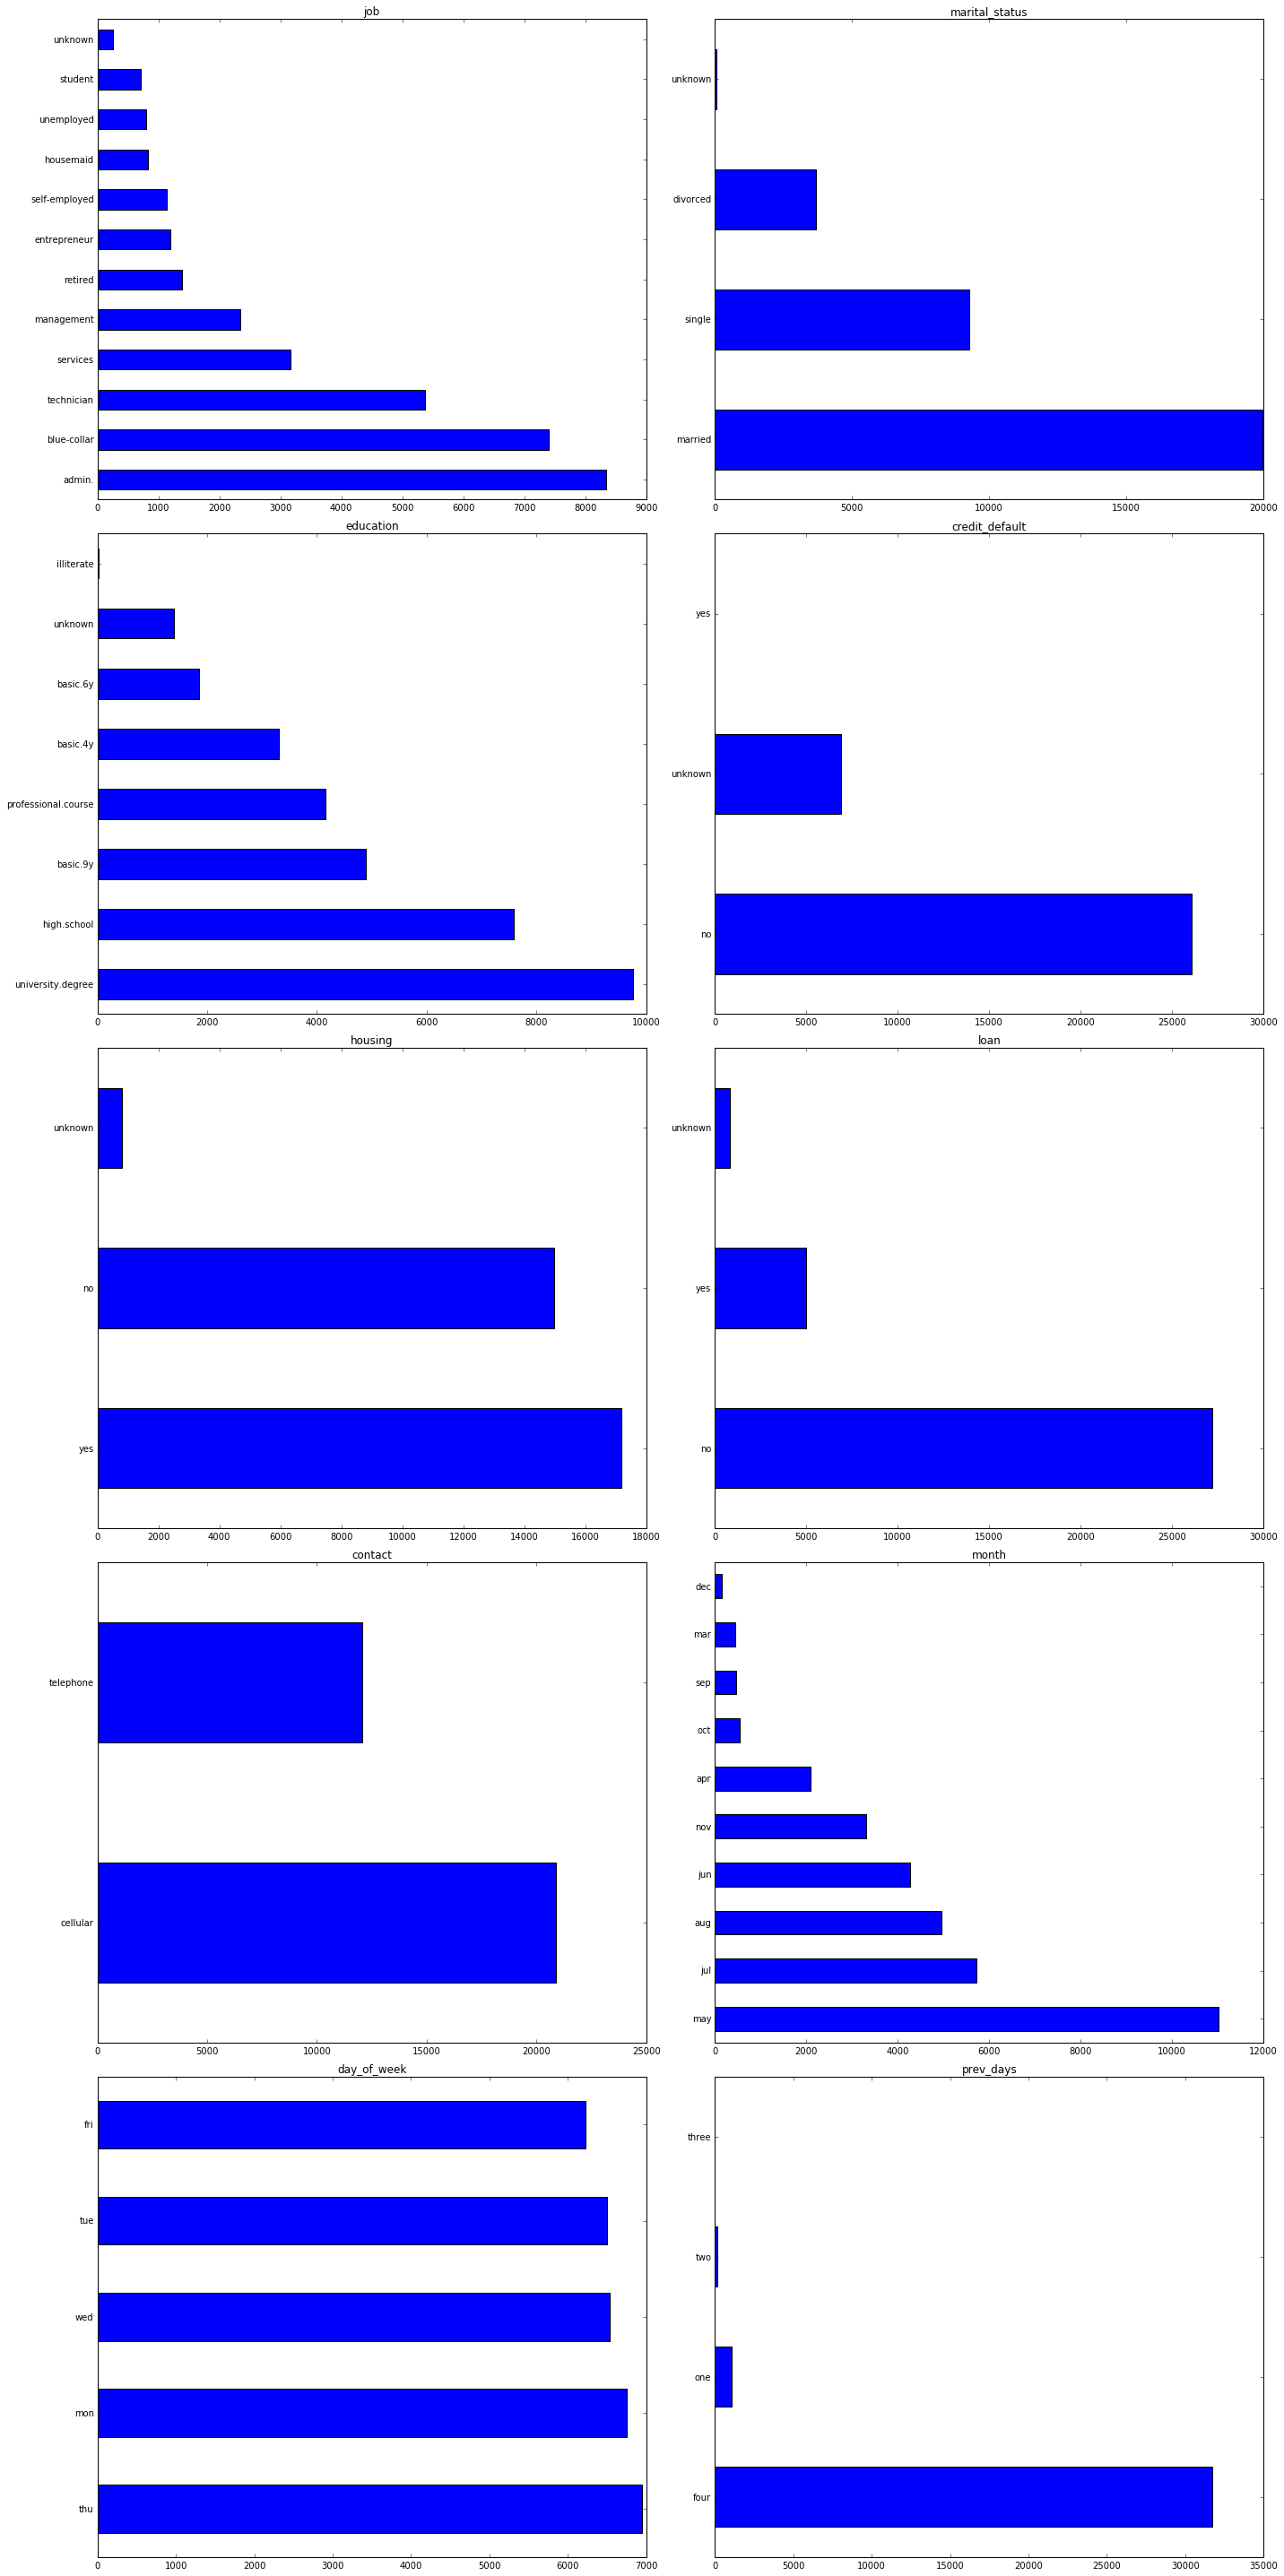

In [13]:
#plt.subplots(nrows=5, ncols=2, figsize=(25, 30))
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
for i, (name, ax) in enumerate(zip(list(data_category), axes.ravel())):
    train[name].value_counts().plot(kind='barh',ax = ax,title=name)
plt.tight_layout()

In [14]:
train['prev_days'].value_counts()

four     31707
one       1084
two        152
three        7
Name: prev_days, dtype: int64

In [15]:
##we have recorded the categorical variable, we need to label encoder to convert string to number
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

list_cat = list(data_category)
for cat1 in list_cat:
    #number.fit_transform(train[cat].astype('str'))
    train.loc[:,cat1] = number.fit_transform(train[cat1]).astype('object')
    #continue
#train
train.dtypes

age               float64
job                object
marital_status     object
education          object
credit_default     object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
prev_days          object
prev_contacts       int64
prev_outcomes      object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [112]:
from sklearn.model_selection import train_test_split
data_train,data_test,label_train,label_test = train_test_split(train, label=='yes', random_state = 0, stratify=label)

# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

In [18]:
continuous = train.columns[train.dtypes != "object"]
continuous

Index([u'age', u'campaign', u'prev_contacts', u'emp_var_rate',
       u'cons_price_idx', u'cons_conf_idx', u'euribor3m', u'nr_employed'],
      dtype='object')

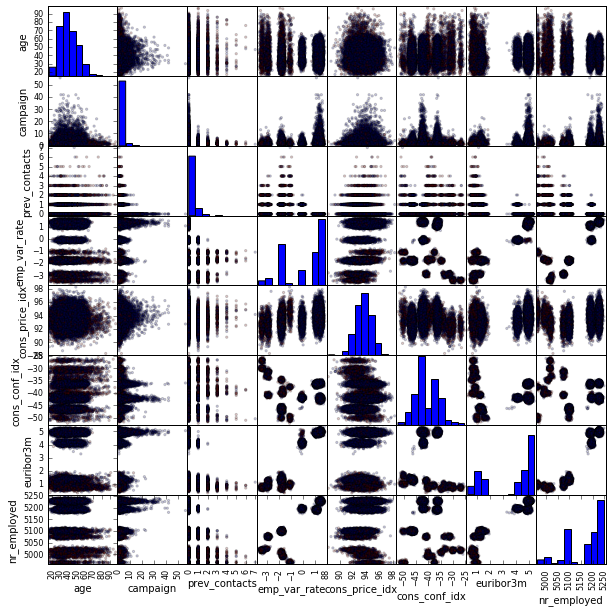

In [19]:
pd.tools.plotting.scatter_matrix(data_train[continuous],c = label_train, alpha=.2, figsize=(10, 10));

In [21]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
F, p = f_classif(data_train, label_train)
ids = np.argsort(F)

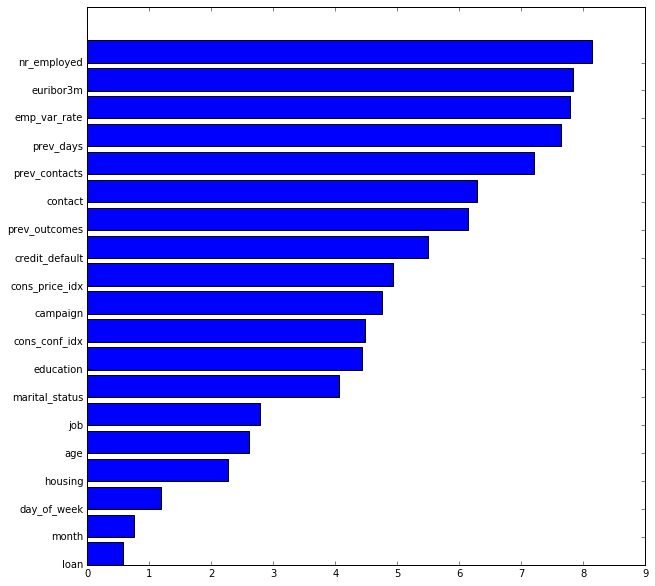

In [22]:
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(F)), np.log(F[ids] + 1))
plt.yticks(np.arange(len(F)), data_train.columns[ids]);

In [23]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(data_train, label_train.values)
inds = np.argsort(mi)

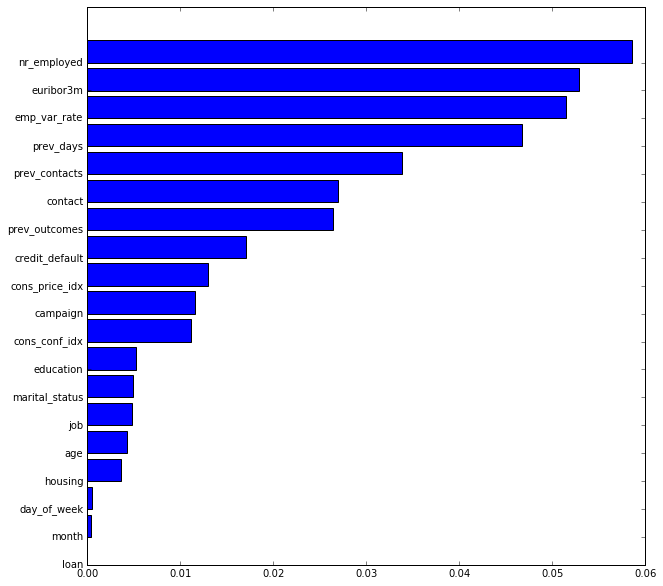

In [24]:
plt.figure(figsize=(10, 10))
#plt.barh(np.arange(len(mi)), mi[inds])
plt.barh(np.arange(len(mi)), np.log(mi[inds] + 1))
plt.yticks(np.arange(len(mi)),data_train.columns[ids]);

In [111]:
##above, f_refression and mutual_info_regression have the same result in feature selction, so we
#can choose either of the two, here we use mutual_info_regression

from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.pipeline import make_pipeline 
#select = make_pipeline(SelectPercentile(score_func=f_regression, percentile=30), PolynomialFeatures(interaction_only=True), VarianceThreshold())
select = SelectPercentile(mutual_info_classif, percentile=85)

In [113]:

select.fit(data_train, label_train.values)

SelectPercentile(percentile=85,
         score_func=<function mutual_info_classif at 0x11e3a8a28>)

In [114]:
feature_name = data_train.columns[select.get_support()]

In [115]:
train_selected = select.transform(data_train)

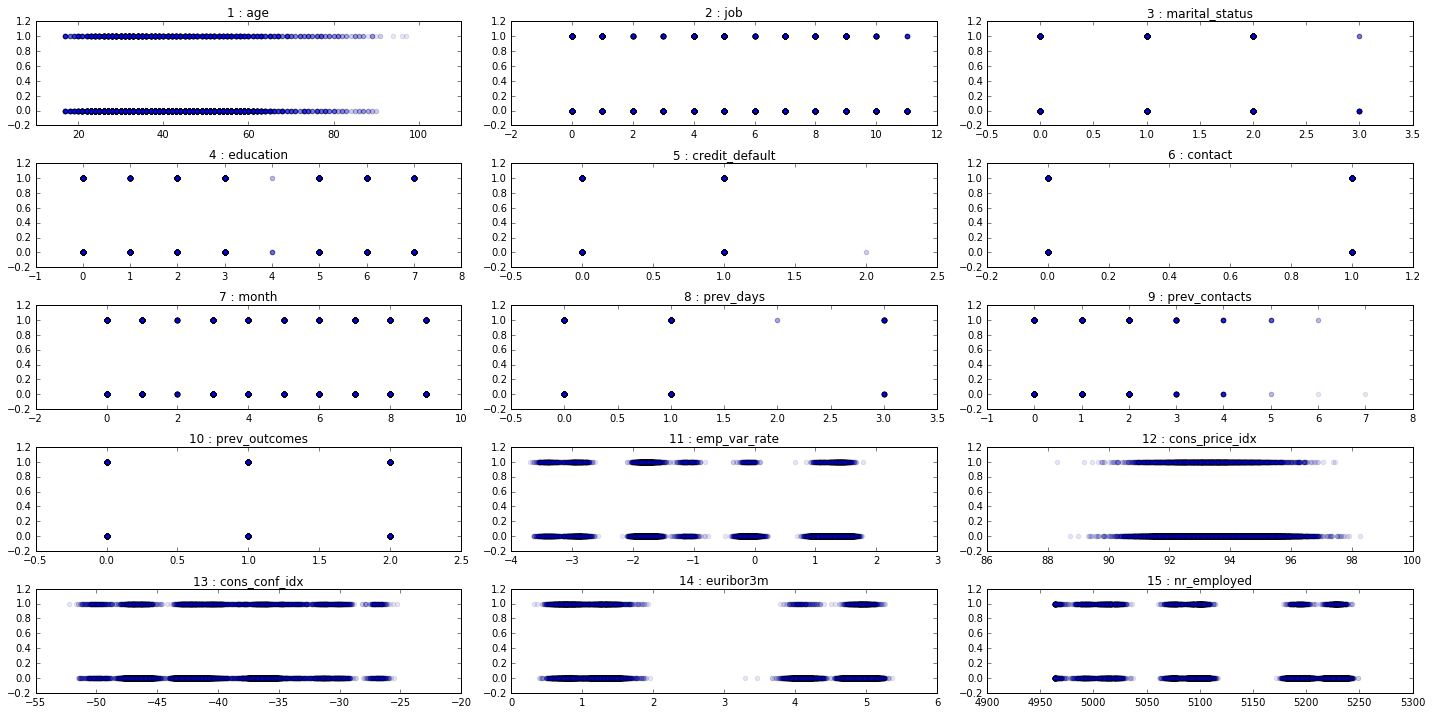

In [29]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for i, (name, ax) in enumerate(zip(feature_name, axes.ravel())):
    ax.scatter(train_selected[:, i], label_train.values, alpha=.1)
    ax.set_title("{} : {}".format(i+1, name))
plt.tight_layout()

# Step2 - ModelSet1 

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

In [116]:
### after featuren selction, we need to get dummy variables for categorical variables
#for selected categorical data
selected_category = list((set(data_category))&set(feature_name))       
selected_category

['education',
 'marital_status',
 'prev_outcomes',
 'day_of_week',
 'credit_default',
 'job',
 'contact',
 'month',
 'prev_days']

In [117]:
selected_continuous = list((set(continuous))&set(feature_name))
selected_continuous

['cons_price_idx',
 'emp_var_rate',
 'age',
 'nr_employed',
 'prev_contacts',
 'cons_conf_idx',
 'euribor3m']

In [118]:
feature_name

Index([u'age', u'job', u'marital_status', u'education', u'credit_default',
       u'contact', u'month', u'day_of_week', u'prev_days', u'prev_contacts',
       u'prev_outcomes', u'emp_var_rate', u'cons_price_idx', u'cons_conf_idx',
       u'euribor3m', u'nr_employed'],
      dtype='object')

In [106]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(categorical_features = mask,sparse = False)
# enc.fit(train_selected)
# train_selected_with_dummy = enc.transform(train_selected)
train_dummies = pd.get_dummies(data_train[selected_category],drop_first=True)
train_selected_with_dummy = pd.concat([data_train[selected_continuous],train_dummies],axis=1)
train_selected_with_dummy.head()

,cons_price_idx,emp_var_rate,campaign,age,nr_employed,prev_contacts,cons_conf_idx,euribor3m,education_1,education_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,prev_days_1,prev_days_2,prev_days_3
12353,94.236694,1.178261,15.0,52.0,5192.0,0,-37.048583,4.746075,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29303,94.103725,-2.000945,4.0,41.0,5096.0,1,-46.096535,1.427209,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965,94.790008,1.331550,1.0,36.0,5227.0,0,-41.728380,4.990515,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26504,94.525150,1.335875,8.0,46.0,5233.0,0,-42.931450,5.070245,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23299,94.173802,1.468371,3.0,51.0,5228.0,0,-42.645052,5.113962,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(train_selected_with_dummy, label_train, random_state=0)

In [108]:
y_train.value_counts()

False    16421
True      2113
Name: subscribed, dtype: int64

In [36]:
##scale the data
from sklearn.preprocessing import RobustScaler
rs = RobustScaler().fit(X_train)
X_train_scaled = rs.transform(X_train)
X_test_scaled = rs.transform(X_test)

In [37]:
###since the label is imbalanced，we need to do oversample or undersample on our dataset
###under_sample
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train, y_train)
print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))

(18534, 45)
(4226, 45)
[2113 2113]


In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(X_train, y_train)
print(X_train.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(18534, 45)
(32842, 45)
[16421 16421]


##### Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [4]:
### for undersample
from imblearn.pipeline import make_pipeline as make_imb_pipeline
param_grid = {'logisticregession__C': [0.001, 0.01, 0.1, 1, 10, 50]}
undersample_pipe = make_imb_pipeline(SMOTE(random_state=42),PolynomialFeatures(),
                     VarianceThreshold(), LogisticRegression(fit_intercept=True))


#undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegression(fit_intercept=True))
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train_scaled, y_train)
train_score = grid_search.score(X_train_scaled, y_train)
print "train score is ", train_score
#scores = cross_val_score(undersample_pipe, X_train_scaled, y_train, cv=10,scoring='roc_auc')
#score = grid_search.score(X_test_scaled)
test_score = grid_search.score(X_test_scaled,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

NameError: name 'X_train_scaled' is not defined

In [42]:
### for oversample
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50]}
oversample_pipe = make_imb_pipeline(RandomOverSampler(), LogisticRegression(fit_intercept=True))
grid_search1 = GridSearchCV(oversample_pipe,param_grid, scoring='roc_auc', cv=5)
grid_search1.fit(X_train_scaled, y_train)
train_score1 = grid_search1.score(X_train_scaled, y_train)
print "train score is ", train_score1
test_score1 = grid_search1.score(X_test_scaled,y_test)
print("test score is ", test_score1)
print(grid_search1.best_estimator_)

train score is  0.795827881103
test score is  0.776864941166
Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=None, ratio='auto')), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


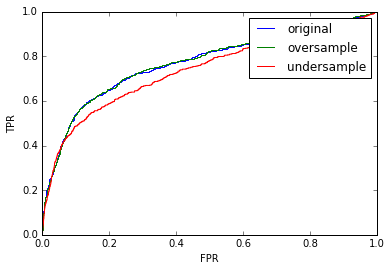

In [45]:
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)

from sklearn.metrics import roc_curve
oversample_pipe.fit(X_train_scaled, y_train)
props_oversample = oversample_pipe.predict_proba(X_test_scaled)[:, 1]
fpr_over, tpr_over, _ = roc_curve(y_test, props_oversample)

undersample_pipe.fit(X_train_scaled, y_train)
props_undersample = undersample_pipe.predict_proba(X_test_scaled)[:, 1]
fpr_under, tpr_under, _ = roc_curve(y_test, props_undersample)

lr = LogisticRegression().fit(X_train_scaled, y_train)
props_original = lr.predict_proba(X_test_scaled)[:, 1]
fpr_org, tpr_org, _ = roc_curve(y_test, props_original)

plt.plot(fpr_org, tpr_org, label="original")
plt.plot(fpr_over, tpr_over, label="oversample")
plt.plot(fpr_under, tpr_under, label="undersample")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

##### SVM 

In [46]:
from sklearn.svm import LinearSVC,SVC
param_grid = [{'svc__kernel': ['rbf'], 
                     'svc__C': [1,2,5]},
                    {'svc__kernel': ['linear'], 'svc__C': [1,2,5]}]
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), SVC(probability=True))
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train_scaled, y_train)
train_score = grid_search.score(X_train_scaled, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test_scaled,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

train score is  0.791038698874
test score is  0.766035207325
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


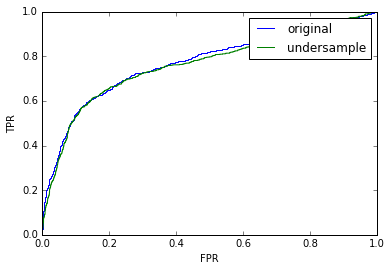

In [47]:
% matplotlib inline
from sklearn.metrics import roc_curve
# oversample_pipe.fit(X_train_scaled, y_train)
# props_oversample = oversample_pipe.predict_proba(X_test_scaled)[:, 1]
# print props_oversample
# print type(props_oversample)
# fpr_over, tpr_over, _ = roc_curve(y_test, props_oversample)

undersample_pipe.fit(X_train_scaled, y_train)
props_undersample = undersample_pipe.predict_proba(X_test_scaled)[:, 1]
fpr_under, tpr_under, _ = roc_curve(y_test, props_undersample)

lr = LogisticRegression().fit(X_train_scaled, y_train)
props_original = lr.predict_proba(X_test_scaled)[:, 1]
fpr_org, tpr_org, _ = roc_curve(y_test, props_original)

plt.plot(fpr_org, tpr_org, label="original")
#plt.plot(fpr_over, tpr_over, label="oversample")
plt.plot(fpr_under, tpr_under, label="undersample")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

#### Ridge

In [48]:
from sklearn.linear_model import RidgeClassifier
param_grid = {'ridgeclassifier__alpha':[1,0.1,0.01,0.001,0]}
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), RidgeClassifier())
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train_scaled, y_train)
train_score = grid_search.score(X_train_scaled, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test_scaled,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)


train score is  0.792258121339
test score is  0.773355520693
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('ridgeclassifier', RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001))])


In [49]:
oversample_pipe = make_imb_pipeline(RandomOverSampler(), RidgeClassifier())
param_grid = {'ridgeclassifier__alpha':[1,0.1,0.01,0.001,0]}
grid_search1 = GridSearchCV(oversample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search1.fit(X_train_scaled, y_train)
train_score1 = grid_search1.score(X_train_scaled, y_train)
print("train score is ", train_score1)
test_score1 = grid_search1.score(X_test_scaled,y_test)
print("test score is ", test_score1)
print(grid_search1.best_estimator_)

train score is  0.794482138563
test score is  0.77363994396
Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=None, ratio='auto')), ('ridgeclassifier', RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001))])


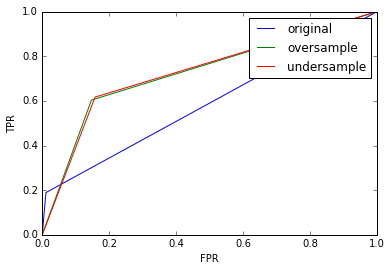

In [50]:
% matplotlib inline
from sklearn.metrics import roc_curve
oversample_pipe.fit(X_train_scaled, y_train)
props_oversample = oversample_pipe.predict(X_test_scaled)
fpr_over, tpr_over, _ = roc_curve(y_test, props_oversample)

undersample_pipe.fit(X_train_scaled, y_train)
props_undersample = undersample_pipe.predict(X_test_scaled)
fpr_under, tpr_under, _ = roc_curve(y_test, props_undersample)

lr = LogisticRegression().fit(X_train_scaled, y_train)
props_original = lr.predict(X_test_scaled)
fpr_org, tpr_org, _ = roc_curve(y_test, props_original)

plt.plot(fpr_org, tpr_org, label="original")
plt.plot(fpr_over, tpr_over, label="oversample")
plt.plot(fpr_under, tpr_under, label="undersample")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

# Step3 - ModelSet2 


* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

#### Decision Tree

In [51]:
##undersample
from sklearn.tree import DecisionTreeClassifier
param_grid = {"decisiontreeclassifier__criterion": ["gini", "entropy"],
              "decisiontreeclassifier__min_samples_split": [2, 10, 20],
              "decisiontreeclassifier__max_depth": [None, 2, 5, 10],
              "decisiontreeclassifier__min_samples_leaf": [1, 5, 10],
              "decisiontreeclassifier__max_leaf_nodes": [None, 5, 10, 20],
              "decisiontreeclassifier__max_features":["auto","sqrt","log2"]
              }
#param_grid = {"decisiontreeclassifier__max_features":["auto","sqrt","log2"]}
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), DecisionTreeClassifier(random_state = 0))
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

train score is  0.764333358417
test score is  0.754766525303
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features='auto', max_leaf_nodes=10,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])


In [52]:
##oversample
param_grid = {"decisiontreeclassifier__criterion": ["gini", "entropy"],
              "decisiontreeclassifier__min_samples_split": [2, 10, 20],
              "decisiontreeclassifier__max_depth": [None, 2, 5, 10],
              "decisiontreeclassifier__min_samples_leaf": [1, 5, 10],
              "decisiontreeclassifier__max_leaf_nodes": [None, 5, 10, 20],
              "decisiontreeclassifier__max_features":["auto","sqrt","log2"]
              
              }
#param_grid = {"decisiontreeclassifier__max_features":["auto","sqrt","log2"]}
oversample_pipe = make_imb_pipeline(RandomOverSampler(), DecisionTreeClassifier(random_state = 0))
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

train score is  0.780610923421
test score is  0.766685916881
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=20,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])


#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {"randomforestclassifier__max_depth": [3,5,10, None],
              "randomforestclassifier__max_features": [1, 3, 10],
              "randomforestclassifier__min_samples_split": [1, 3,5, 10],
              "randomforestclassifier__min_samples_leaf": [1, 3,5,10],
              "randomforestclassifier__bootstrap": [True, False],
              "randomforestclassifier__criterion": ["gini", "entropy"],
              "randomforestclassifier__max_features":[5,10,15,20]
             }
              
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier(random_state = 0))
grid_search = GridSearchCV(undersample_pipe, param_grid , scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

train score is  0.80362081809
test score is  0.776024390581
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=5, max_features=15, max_leaf_nodes=None,...estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])


##### GradientBoosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'gradientboostingclassifier__n_estimators':range(1,30,3)}
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), GradientBoostingClassifier(learning_rate=0.1,random_state=10))
grid_search = GridSearchCV(estimator = undersample_pipe, param_grid = param_grid, scoring='roc_auc',iid=False, cv=10)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
print("train score is ", train_score)
test_score = grid_search.score(X_test,y_test)
print("test score is ", test_score)
print(grid_search.best_estimator_)

train score is  0.798361920011
test score is  0.775773524389
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=True,
          return_indices=False)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
        ...ors=22, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False))])


# Step4 - Ensemble [20 points + 10 Bonus points]



In [123]:
#write code below, you can make multiple cells
##assert True
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_selected_with_dummy, label_train, random_state=0)
#rm = RandomUnderSampler(random_state = 1)
#X_train,y_train = rm.fit_sample(X_train,y_train)
# rm = SMOTE(random_state=42)
# X_train,y_train = rm.fit_sample(X_train,y_train)
make_pipe = make_imb_pipeline(SMOTE(random_state = 10),PolynomialFeatures(),
                     VarianceThreshold(),VotingClassifier([('logreg', LogisticRegression(C=1,class_weight='balanced')),
                           ('gredient', GradientBoostingClassifier(max_features='auto',learning_rate=0.1,n_estimators=200,max_depth=3,presort='auto',random_state=10)),
                           ('forest',RandomForestClassifier(max_depth=5, max_features=20,random_state=10))],
                         voting='soft'))

score = cross_val_score(make_pipe, train_selected_with_dummy, label_train, cv=5, scoring="roc_auc")
print("test score is ", np.mean(score))
#print "test score is ", score

('test score is ', 0.78716389909541129)


In [57]:
X_feature = pd.DataFrame(data[feature_name])
holdout_feature = pd.DataFrame(holdout[feature_name])
total = pd.concat([X_feature,holdout_feature])
total.head()

,age,job,marital_status,education,credit_default,contact,month,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,41.0,blue-collar,married,basic.9y,no,cellular,apr,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0
1,46.0,entrepreneur,married,unknown,no,cellular,may,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0
2,56.0,unemployed,married,basic.9y,no,cellular,nov,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0
3,89.0,retired,divorced,basic.4y,no,cellular,may,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0
4,34.0,entrepreneur,married,university.degree,unknown,cellular,jul,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0


In [58]:
dummies = pd.get_dummies(total[selected_category],drop_first=True)
total_selected_with_dummy = pd.concat([total[selected_continuous],dummies],axis=1)
total_selected_with_dummy.shape

(41188, 43)

In [59]:
X_selected_with_dummy = total_selected_with_dummy.iloc[:train.shape[0],:]
X_selected_with_dummy.shape

(32950, 43)

In [60]:
holdout_selected_with_dummy = total_selected_with_dummy.iloc[train.shape[0]:,:]
holdout_selected_with_dummy.shape

(8238, 43)

In [61]:
#lg = LogisticRegression(C=1)

pipe1 = make_imb_pipeline(SMOTE(random_state=42),PolynomialFeatures(),
                     VarianceThreshold(),VotingClassifier([('logreg', LogisticRegression(C=1)),
                           ('gredient', GradientBoostingClassifier(learning_rate=0.1, max_features='auto',n_estimators=200,max_depth=3,presort='auto',random_state=10)),
                           ('forest',RandomForestClassifier(max_depth=5, max_features='auto',random_state=10,n_estimators=200))],
                         voting='soft'))
#X_selected_with_dummy1,label1 = rm.fit_sample(X_selected_with_dummy,label)
pipe1.fit(X_selected_with_dummy,label)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('votingclassifier', VotingClassifier(estimators=[('logreg', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
   ...te=10,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=None))])

In [63]:

holdout_selected_with_dummy.columns

Index([u'cons_price_idx', u'emp_var_rate', u'age', u'nr_employed',
       u'prev_contacts', u'cons_conf_idx', u'euribor3m', u'prev_days',
       u'education_basic.6y', u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'education_unknown',
       u'marital_status_married', u'marital_status_single',
       u'marital_status_unknown', u'prev_outcomes_nonexistent',
       u'prev_outcomes_success', u'credit_default_unknown',
       u'credit_default_yes', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'contact_telephone', u'month_aug', u'month_dec', u'month_jul',
       u'month_jun', u'month_mar', u'month_may', u'month_nov', u'month_oct',
       u'month_sep'],
      dtype='object')

In [64]:
subscribed = pipe1.predict_proba(holdout_selected_with_dummy)[:,1]
subscribed = pd.DataFrame({'subscribed': subscribed})
subscribed.head()

,subscribed
0,0.168705
1,0.154076
2,0.236049
3,0.126756
4,0.227117


In [65]:
ID = pd.DataFrame({'ID':holdout['ID']})
result = pd.DataFrame()
result['ID'] = ID
result['subscribed'] = subscribed
result.to_csv("result.csv")
result.head()

,ID,subscribed
0,2866,0.168705
1,1957,0.154076
2,768,0.236049
3,4510,0.126756
4,7893,0.227117


In [ ]:
assert score >= 0.7